# Module 3 Project - Hospital Bills

# Final Project Submission

Please fill out:
* Student name: Bram Tunggala
* Student pace: full time
* Scheduled project review date/time: May 16 @2:30pm 
* Instructor name: Brandon Lewis
* Blog post URL: 

# Predicting percentage of payment made by patients on overdue hospital bill based on household income 



### The Dataset 
The data set was derrived from a combination of zip code data (SimpleMaps) and hospital patient debt data (Company unnamed) 

### Goal
Our goal in this notebook is to predict if relative wealth (median house hold income) and location by zip codes, have higher likely hood of paying their overdue hospital bill. 

**Details:** For our target, we will categorize payment prediction by percentage of invoice paid into 5 classes: 
- Group A: 90-100%
- Group B: 80-90% 
- Group C: 70-80%
- Group D: 60-70%
- Group E: 50-60%
- Group F: < 50% 

# Approach
Method: **OSEMN**

The OSEMN and Scientific method is used for the framework of this project. Starting with retriving and cleaning our data to avoid errors down the process. After that, Exploring the data to get a "feel" of what we're looking at intuitively, using visualizations and calling methods. Many iterations will be made in going back and forth between wrangling and exploring our data to prepare the data for modeling. Build and tweak models accordingly, in order to get best results. Then, interpret the results the best possible in order to answer the  question or further the analysis. 

- **Obtaining our data**
- **Preprocessing:**
    - 2.1: Scurbbing the Data
    - 2.2: Dealing with missing data
        - 2.2.1: Missing Data
        - 2.2.2: Dropping columns
    - 2.3: EDA (part 1)
    - 2.4: Basic feature engineering
    - 2.5: EDA (part 2)
        - 2.5.1: Top 5 zip codes
        - 2.5.2: Top 5 States
    - 3.1: Creating subset of data
        - 3.1.2: Feature selection
        - 3.1.3: Normalizing our data
- **Machine Learning:**
    - 4.1: Importing library for models
        - 4.1.2: Model_1
        - 4.1.3: Model_1_H
        - 4.1.4: Model_2
        - 4.1.5: Model_2_H
    - 4.2: Model comparison 
        - 4.2.1: Classification report 
    - 4.3: Parameter tuning 
        - 4.3.1: Building pipeline for SVM 
        - 4.3.2: Building pipeline for other models 
        - 4.3.3: Declaring hyperparameters
        - 4.3.4: Fit and tune with cross-validation 
    - 4.4: Balancing data (SMOTE)
        - 4.4.1: Generating model using SMOTE
        - 4.4.2: Results
- **Conclusions**
    - 5.1: Feature importance
    - 5.2: Conclusion
    - 5.3: Future work

# Obtaining the Data 

In [2]:
import pandas as pd 
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

smart-open 1.8.0 requires bz2file, which is not installed.
nltk 3.4 requires singledispatch, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
raw_df = pd.read_csv('Project_Data_v2.csv')
raw_df.head()

,Unnamed: 0,Account_ID,Entity_ID,Purchase_ID,Seller_Type,Creditor_Name,Closure_Type,List_Date,Service_Date,Purchased_bal,...,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Year_Born,Gender,Filed_Bankrupcy,Deceased
0,4807561,10271495,10921468,206,HOSPITAL,CHRISTUS Spohn Hospital - Alice,SETTLE,1/4/2012,2/6/2009,100.00,...,TX,78332.0,NaN,48.00,1.0,0.48,1945.0,NaN,NaN,NaN
1,4591833,10271501,10431006,206,HOSPITAL,CHRISTUS Spohn Hospital - Alice,SETTLE,1/4/2012,3/13/2009,42.82,...,TX,78357.0,NaN,24.41,1.0,0.57,1955.0,NaN,NaN,NaN
2,4590773,10271513,10428123,206,HOSPITAL,CHRISTUS Spohn Hospital - Alice,SETTLE,1/4/2012,4/22/2009,171.00,...,TX,78384.0,NaN,95.00,1.0,0.56,1955.0,NaN,NaN,NaN
3,4807569,10271529,10921502,206,HOSPITAL,CHRISTUS Spohn Hospital - Alice,SETTLE,1/4/2012,5/18/2009,3525.00,...,TX,78353.0,NaN,2250.00,9.0,0.64,1945.0,NaN,NaN,NaN
4,4807569,10271597,10921502,206,HOSPITAL,CHRISTUS Spohn Hospital - Alice,SETTLE,1/4/2012,7/6/2009,2008.80,...,TX,78353.0,NaN,1305.72,6.0,0.65,1945.0,NaN,NaN,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556536 entries, 0 to 556535
Data columns (total 21 columns):
Unnamed: 0                 556536 non-null int64
Account_ID                 556536 non-null int64
Entity_ID                  556536 non-null int64
Purchase_ID                556536 non-null int64
Seller_Type                556536 non-null object
Creditor_Name              550519 non-null object
Closure_Type               556536 non-null object
List_Date                  556536 non-null object
Service_Date               556532 non-null object
Purchased_bal              556536 non-null float64
Entity_City                556426 non-null object
Entity_State               556451 non-null object
Entity_Zip                 555721 non-null float64
Median_Household_Income    4118 non-null float64
Total_Paid                 554544 non-null float64
Number_of_payments         554544 non-null float64
Percent_Paid               554544 non-null float64
Year_Born                  523371 non-n

In [5]:
#getting a glimpse of what our data looks like
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,556536.0,7.208170e+06,2.575848e+06,5.00,5518588.75,7468284.50,9327365.75,1.498182e+07
Account_ID,556536.0,1.727041e+07,4.149162e+06,10271480.00,13245991.50,17295968.00,21137581.25,2.422843e+07
Entity_ID,556536.0,1.600203e+07,5.507414e+06,11.00,12473604.75,16334909.50,20577518.75,3.353861e+07
Purchase_ID,556536.0,3.442896e+02,8.062277e+01,206.00,291.00,344.00,402.00,5.010000e+02
Purchased_bal,556536.0,4.148476e+02,8.328988e+02,0.02,100.00,200.00,477.00,2.500000e+05
Entity_Zip,555721.0,5.275740e+04,1.989856e+06,0.00,33330.00,44077.00,70404.00,9.501414e+08
Median_Household_Income,4118.0,6.570903e+04,2.653446e+04,19026.00,44690.00,63473.00,84164.00,1.741530e+05
Total_Paid,554544.0,2.542543e+02,4.364182e+02,0.00,66.85,126.63,291.90,4.720826e+04
Number_of_payments,554544.0,1.841060e+00,3.356548e+00,1.00,1.00,1.00,1.00,2.370000e+02
Percent_Paid,554544.0,6.754689e-01,3.452593e+00,0.00,0.50,0.60,1.00,2.501000e+03


## 2.1 - Scrubbing the Data 

In [6]:
raw_df.columns

Index(['Unnamed: 0', 'Account_ID', 'Entity_ID', 'Purchase_ID', 'Seller_Type',
       'Creditor_Name', 'Closure_Type', 'List_Date', 'Service_Date',
       'Purchased_bal', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Year_Born', 'Gender', 'Filed_Bankrupcy', 'Deceased'],
      dtype='object')

In [7]:
#removing useless columns: Unnamed:0, Purchase_ID, Seller_type, Creditor_name
df = raw_df.drop(['Unnamed: 0', 'Purchase_ID', 'Seller_Type', 'Creditor_Name'], axis=1)

In [8]:
df.head()

,Account_ID,Entity_ID,Closure_Type,List_Date,Service_Date,Purchased_bal,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Year_Born,Gender,Filed_Bankrupcy,Deceased
0,10271495,10921468,SETTLE,1/4/2012,2/6/2009,100.00,ALICE,TX,78332.0,NaN,48.00,1.0,0.48,1945.0,NaN,NaN,NaN
1,10271501,10431006,SETTLE,1/4/2012,3/13/2009,42.82,FREER,TX,78357.0,NaN,24.41,1.0,0.57,1955.0,NaN,NaN,NaN
2,10271513,10428123,SETTLE,1/4/2012,4/22/2009,171.00,SAN DIEGO,TX,78384.0,NaN,95.00,1.0,0.56,1955.0,NaN,NaN,NaN
3,10271529,10921502,SETTLE,1/4/2012,5/18/2009,3525.00,ENCINO,TX,78353.0,NaN,2250.00,9.0,0.64,1945.0,NaN,NaN,NaN
4,10271597,10921502,SETTLE,1/4/2012,7/6/2009,2008.80,ENCINO,TX,78353.0,NaN,1305.72,6.0,0.65,1945.0,NaN,NaN,NaN


## 2.2 - Dealing with missing data

In [9]:
#checking for missing data
df.isna().sum()

Account_ID                      0
Entity_ID                       0
Closure_Type                    0
List_Date                       0
Service_Date                    4
Purchased_bal                   0
Entity_City                   110
Entity_State                   85
Entity_Zip                    815
Median_Household_Income    552418
Total_Paid                   1992
Number_of_payments           1992
Percent_Paid                 1992
Year_Born                   33165
Gender                     407990
Filed_Bankrupcy            548131
Deceased                   555159
dtype: int64

In [10]:
#converting zip code to an object 
df['Entity_Zip'] = df['Entity_Zip'].astype(str)
#Renaming column 
df['Invoice_bal'] = df.Purchased_bal

### 2.2.1 - Missing data
There are 552,418 missing data in Median_Household_Income due to no records from SimpleMaps dataset. Since this is too many to ignore, we will create a column with the mean household income using the city provided in the dataset. 

In [11]:
#importing uszips file to retrive information 
df_zip = pd.read_csv('uszips.csv')
#groupby city
df_city = df_zip.groupby('city')
#creating pd.DataFrame from desired information, taking the mean household income per city 
df_city_mean = pd.DataFrame(df_city.income_household_median.mean())
#reseting index
df_city_mean = df_city_mean.reset_index()
#dropping null values 
df_city_mean.dropna(axis=0, inplace=True)
#revising city to be all upper to match current dataset in order to synch 
df_city_mean['city'] = df_city_mean['city'].str.upper()
df_city_mean.head()

,city,income_household_median
0,AARONSBURG,52788.0
1,ABBEVILLE,39562.0
2,ABBOT,43125.0
3,ABBOTSFORD,42036.0
4,ABBOTT,58750.0


In [12]:
#merging datasets using left join 
df_merge = pd.merge(df, df_city_mean, how='left', left_on='Entity_City' , 
                    right_on='city', left_index=True)

In [13]:
#filling null values in Median_Houshold_Income using the mediam household income in its respective cities
df_merge['Median_Household_Income'] = df_merge.Median_Household_Income.fillna(df_merge['income_household_median'])

In [14]:
df_merge.isna().sum()

Account_ID                      0
Entity_ID                       0
Closure_Type                    0
List_Date                       0
Service_Date                    4
Purchased_bal                   0
Entity_City                   110
Entity_State                   85
Entity_Zip                      0
Median_Household_Income     52967
Total_Paid                   1992
Number_of_payments           1992
Percent_Paid                 1992
Year_Born                   33165
Gender                     407990
Filed_Bankrupcy            548131
Deceased                   555159
Invoice_bal                     0
city                        53006
income_household_median     53006
dtype: int64

### 2.2.2 - Dropping columns 
There is still tons of missing data. It would be irresponsible to assume the median for the remaining null values. Luckly, we don't believe these columns add value and will move forward by dropping it. 

In [15]:
#dropping unused columns and creating new name dataset called data
data = df_merge.copy()
data.drop(['city', 'income_household_median', 'Closure_Type', 'List_Date', 'Service_Date', 'Purchased_bal'], axis=1, inplace=True)

In [16]:
#creating age column 
data['Age'] = 2019 - data.Year_Born
#filling null values with median age, 50 years old
data['Age'] = data.Age.fillna(data.Age.mean())

#fill null values in Household income with mean
data['Median_Household_Income'] = data.Median_Household_Income.fillna(data.Median_Household_Income.mean())

#dropping more unused columns 
data.drop(['Year_Born', 'Filed_Bankrupcy', 'Deceased', 'Gender'],axis=1, inplace=True)

#checking shape and null values
print(data.shape)
data.isna().sum()

(556536, 11)


Account_ID                    0
Entity_ID                     0
Entity_City                 110
Entity_State                 85
Entity_Zip                    0
Median_Household_Income       0
Total_Paid                 1992
Number_of_payments         1992
Percent_Paid               1992
Invoice_bal                   0
Age                           0
dtype: int64

In [17]:
#we are ok with the dropping the remaining null values since its a very small percentage of our dataset
data.dropna(axis=0, inplace=True)
data.shape

(554399, 11)

- Intially, we've shrunk the missing values in Median_Household_Income by roughly 90% to about 52,967 from 552,418 using median household income in their respective cities. We use the mean of Median_Household_Income to fill the rest of the missing values.

- We also filled missing values in Age column with median age of 50 years old. 

- Lastly, we dropped all the rows with missing values. We're comfortable doing this because this is  a large dataset. We only lost 0.6% of the data. Now, we can move forward to our next preprocessing step.

## 2.3 - EDA (part 1)

In [18]:
#Overview of data after intial cleaning
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,554399
Total Missing (%),0.0%
Total size in memory,50.8 MiB
Average record size in memory,96.0 B
Numeric,9
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


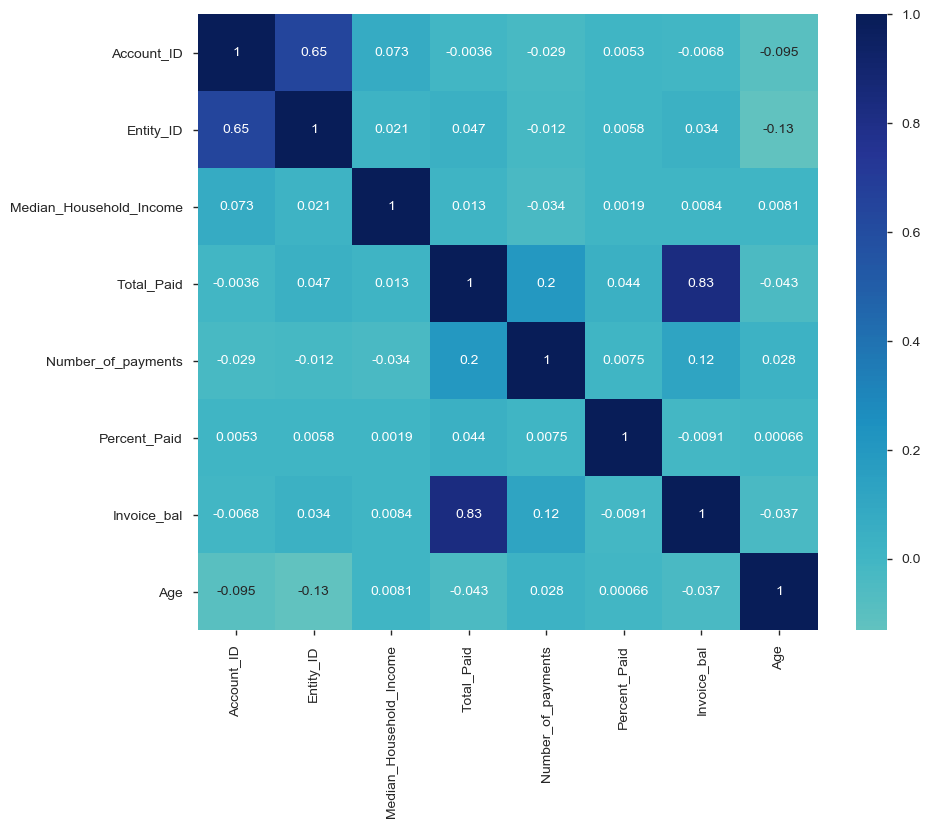

In [19]:
#correlation heatmap for continuous features 
import seaborn as sns 

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ax=ax ,data=data.corr(), center=0 ,cmap='YlGnBu',annot=True)

### Observations: 
Our initial EDA, we have 12 variables/features, 9 numerical, and 3 categorical. We also noticed which distinct values show up the most per variable, and used a heatmap to see if there is multi correlation. 

## 2.4 - Basic feature engineering

We will create a function to group our targets into 5 groups in order to simplify our targets.
- Group A: 90-100%
- Group B: 80-90% 
- Group C: 70-80%
- Group D: 60-70%
- Group E: 50-60%
- Group F: < 50% 


In [20]:
#creating function for different target categories 
def make_target(row): 
    if row >= .9: 
        return('A')
    elif row < .9 and row >= .8: 
        return('B')
    elif row < .8 and row >= .7: 
        return('C')
    elif row < .7 and row >= .60: 
        return('D')
    elif row < .60 and row >= .50:
        return('E')
    else: 
        return('F')

In [21]:
#creating function to bin Median_Household_Income into 8 categories 
def make_income(row):
    if row > 150000 : return('0ver_150k')
    elif row <= 150000 and row > 100000 :
        return('100k_to_150k')
    elif row <= 100000 and row > 75000 :
        return('75k_to_100k')
    elif row <= 75000 and row > 50000 : 
        return('50k_to_75k')
    elif row <= 50000 and row > 35000 : 
        return('35k_to_50k')
    elif row <= 35000 and row > 25000 : 
        return('25k_to_35k')
    elif row <= 25000 and row > 20000 : 
        return('20k_to_25k')
    else : 
        return('Under_20k')
    

In [22]:
#applying target and income function and creating new column call Target 
data['Target'] = data.Percent_Paid.apply(make_target)
data['Income_level'] = data.Median_Household_Income.apply(make_income)

In [23]:
#checking for target distribution
print(data.Target.value_counts())
data.Target.value_counts(normalize=True)

A    152008
E    144877
F    103195
D     76651
C     63375
B     14293
Name: Target, dtype: int64


A    0.274185
E    0.261323
F    0.186139
D    0.138260
C    0.114313
B    0.025781
Name: Target, dtype: float64

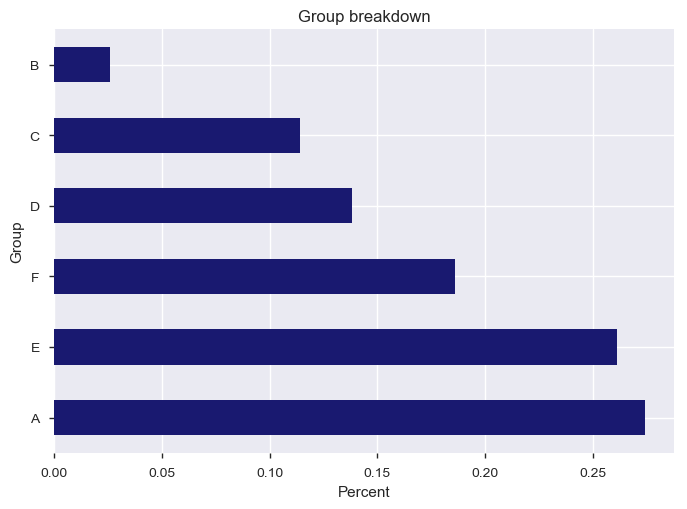

In [24]:
#visualizing targets
data.Target.value_counts(normalize=True).plot(kind='barh', color='midnightblue')
plt.xlabel('Percent')
plt.ylabel('Group')
plt.title('Group breakdown');

We notice that most accounts fall under group A, with group E, a close second.

In [25]:
data.head()

,Account_ID,Entity_ID,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Invoice_bal,Age,Target,Income_level
187,10271495,10921468,ALICE,TX,78332.0,41966.000,48.00,1.0,0.48,100.00,74.0,F,35k_to_50k
5910,10271501,10431006,FREER,TX,78357.0,44846.000,24.41,1.0,0.57,42.82,64.0,E,35k_to_50k
14721,10271513,10428123,SAN DIEGO,TX,78384.0,76554.375,95.00,1.0,0.56,171.00,64.0,E,75k_to_100k
5122,10271529,10921502,ENCINO,TX,78353.0,62181.500,2250.00,9.0,0.64,3525.00,74.0,D,50k_to_75k
5122,10271597,10921502,ENCINO,TX,78353.0,62181.500,1305.72,6.0,0.65,2008.80,74.0,D,50k_to_75k


#### Creating six new features 

In [26]:
#creating new features to help increase model accuracy 
data['Age_MedIncome'] = data.Age * data.Median_Household_Income
data['PercentPaid_MedIncome'] = data.Percent_Paid * data.Median_Household_Income
data['Numpymts_Prcntpaid'] = data.Number_of_payments * data.Percent_Paid
data['Invbal_Prcntpaid'] = data.Invoice_bal * data.Percent_Paid
data['Invbal_MedIncome'] = (data.Invoice_bal * data.Median_Household_Income) / 100 
data['Invbal_Age'] = data.Invoice_bal * data.Age

In [27]:
data.head()

,Account_ID,Entity_ID,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Invoice_bal,Age,Target,Income_level,Age_MedIncome,PercentPaid_MedIncome,Numpymts_Prcntpaid,Invbal_Prcntpaid,Invbal_MedIncome,Invbal_Age
187,10271495,10921468,ALICE,TX,78332.0,41966.000,48.00,1.0,0.48,100.00,74.0,F,35k_to_50k,3105484.0,20143.680,0.48,48.0000,4.196600e+04,7400.00
5910,10271501,10431006,FREER,TX,78357.0,44846.000,24.41,1.0,0.57,42.82,64.0,E,35k_to_50k,2870144.0,25562.220,0.57,24.4074,1.920306e+04,2740.48
14721,10271513,10428123,SAN DIEGO,TX,78384.0,76554.375,95.00,1.0,0.56,171.00,64.0,E,75k_to_100k,4899480.0,42870.450,0.56,95.7600,1.309080e+05,10944.00
5122,10271529,10921502,ENCINO,TX,78353.0,62181.500,2250.00,9.0,0.64,3525.00,74.0,D,50k_to_75k,4601431.0,39796.160,5.76,2256.0000,2.191898e+06,260850.00
5122,10271597,10921502,ENCINO,TX,78353.0,62181.500,1305.72,6.0,0.65,2008.80,74.0,D,50k_to_75k,4601431.0,40417.975,3.90,1305.7200,1.249102e+06,148651.20


In [28]:
#converting features that are strings to categories for one-hot-encoding
data['Target'] = data.Target.astype('category')
data['Entity_Zip'] = data.Entity_Zip.astype('category')
data['Entity_City'] = data.Entity_City.astype('category')
data['Entity_State'] = data.Entity_State.astype('category')
data['Income_level'] = data.Income_level.astype('category')
data.dtypes

Account_ID                    int64
Entity_ID                     int64
Entity_City                category
Entity_State               category
Entity_Zip                 category
Median_Household_Income     float64
Total_Paid                  float64
Number_of_payments          float64
Percent_Paid                float64
Invoice_bal                 float64
Age                         float64
Target                     category
Income_level               category
Age_MedIncome               float64
PercentPaid_MedIncome       float64
Numpymts_Prcntpaid          float64
Invbal_Prcntpaid            float64
Invbal_MedIncome            float64
Invbal_Age                  float64
dtype: object

## 2.5 - EDA (part 2)

In [29]:
#seperating dataframes by grade
A = data[data.Target == 'A']
B = data[data.Target == 'B']
C = data[data.Target == 'C']
D = data[data.Target == 'D']
E = data[data.Target == 'E']
F = data[data.Target == 'F']

**Details:** We will categorize payment prediction by percentage of bill paid into 6 bins: 
- Group A: 90-100%
- Group B: 80-90% 
- Group C: 70-80%
- Group D: 65-70%
- Group E: 50-65% 
- Group F: < 50%

In [30]:
print('Group E')
print(f'Avg. Invoice balance: ${round(E.Invoice_bal.mean(),2)}')
print(f'Avg. Paid amount: ${round(E.Total_Paid.mean(),2)}')
print(f'Avg. Number of payments: {round(E.Number_of_payments.mean(),2)}')
print(f'Median household income: ${round(E.Median_Household_Income.mean(),2)}', '\n')
print('Group A')
print(f'Avg. Invoice balance: ${round(A.Invoice_bal.mean(),2)}')
print(f'Avg. Paid amount: ${round(A.Total_Paid.mean(),2)}')
print(f'Avg. Number of payments: {round(A.Number_of_payments.mean(),2)}')
print(f'Median household income: ${round(A.Median_Household_Income.mean(),2)}')

Group E
Avg. Invoice balance: $452.09
Avg. Paid amount: $229.98
Avg. Number of payments: 1.37
Median household income: $55407.19 

Group A
Avg. Invoice balance: $268.22
Avg. Paid amount: $271.49
Avg. Number of payments: 2.26
Median household income: $56472.35


### Observations: 
#### Q. Top household income? 
A. Income level between 50k to 75K, median income of 55.88k

#### Q. Which grade has the highest frequency? 
A: Grade **A** has over 152k accounts paid

#### Q. Of those 152k + accounts, Grade A...
What is the average purchased balanced? 
**A: 268.22**

What is the average paid amount? 
**A: 271.49**

What is the average number of payments? 
**A: 2.2** 

What is the median household income? 
**A: 56.47k**

What are the top 3 zipcodes? 
1. 44107 (876)
2. 44124 (720)
3. 44212 (619)

What is the total collected amount for group A?
**A: 41.2M**

#### Q. Of those 152K + accounts, Grade E...
What is the average purchased balanced? 
**A: 452.09**

What is the average paid amount? 
**A: 229.98**

What is the average number of payments? 
**A: 1.37**

What is the median household income? **A: 55.k**

What are the top 3 zipcodes? 
1. 44107 (1023)
2. 44124 (925)
3. 44212 (889)

What is the total collected amount for group D?
**A: 33.3M**

**Intuitive assumptions:** 
The average houshold income from group A and E that pays more than 50% of their bill, are between 45k - 55k and has a an average age of 50. Intuitively, I assume people in this income range and age cares about their credit score vs. other income ranges, therefore they either pay-off or settle the bill for a discount in order to avoid a reduction in credit score. 
[FED data on income and credit score correlation](https://www.federalreserve.gov/econres/notes/feds-notes/are-income-and-credit-scores-highly-correlated-20180813.htm)

### 2.5.1 - Top 5 zip codes 

In [31]:
#converting target and income level column into strings in order to graph
data['Target'] = data.Target.astype('str')
data['Income_level'] = data.Income_level.astype('str')
data['Entity_State'] = data.Entity_State.astype('str')

In [32]:
#top 5 zipcodes where accounts made payments
zip_44107 = data[data.Entity_Zip == '44107.0']
zip_44124 = data[data.Entity_Zip == '44124.0']
zip_44212 = data[data.Entity_Zip == '44212.0']
zip_44118 = data[data.Entity_Zip == '44118.0']
zip_44060 = data[data.Entity_Zip == '44060.0']

Using visualizations to get an understanding of zip code details.

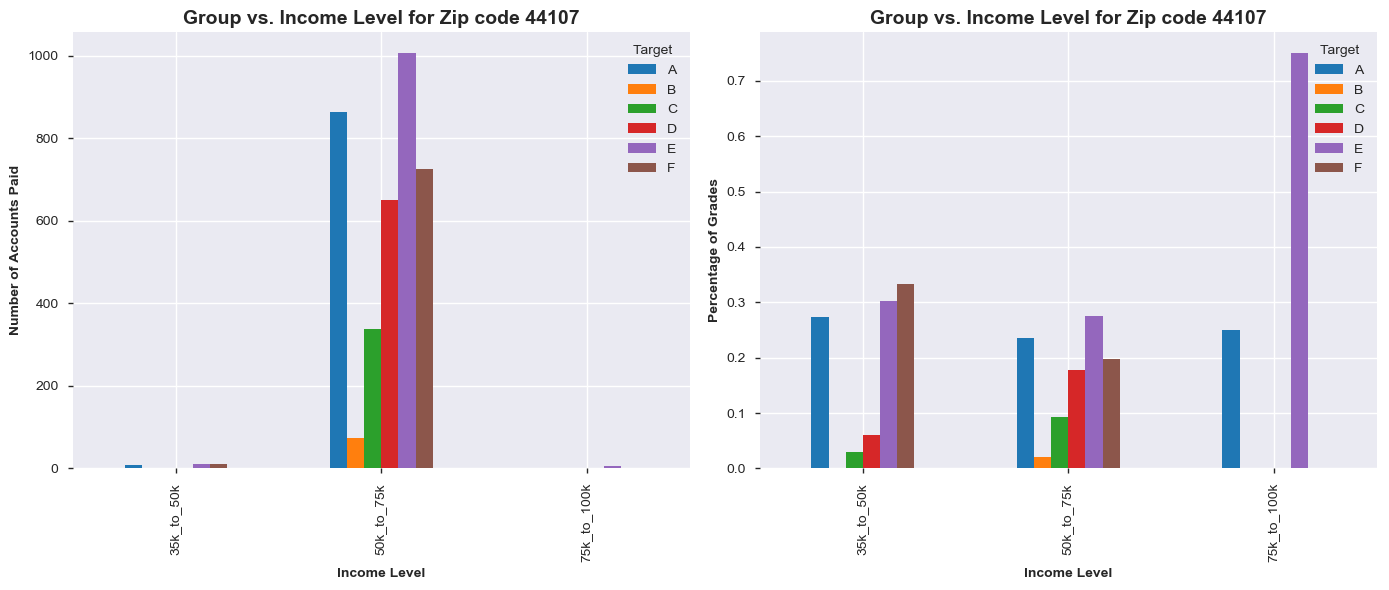

In [33]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))


df_44107 = zip_44107.groupby('Income_level')['Target'].value_counts().unstack()
df_44107.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Income Level',rotation=0, fontsize=10, fontweight='bold')
ax1.set_ylabel('Number of Accounts Paid',fontsize=10, fontweight='bold')
ax1.set_title('Group vs. Income Level for Zip code 44107', fontsize=14, fontweight='bold', loc='center')

df_44107 = zip_44107.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
df_44107.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Income Level',rotation=0, fontsize=10, fontweight='bold')
ax2.set_ylabel('Percentage of Grades',fontsize=10, fontweight='bold')
ax2.set_title('Group vs. Income Level for Zip code 44107', fontsize=14, fontweight='bold', loc='center')


plt.tight_layout()
plt.show();

Above is a breakdown of our top zip code, 44107. As you can see, 98% of the payers within zip code 44107 has an income level in the range of 50k-75k. 

Grade break down within that income level:
- A: 23%
- B: 2%
- C: 9%
- D: 18%
- E: 28%
- F: 20%

### 2.5.2 - Top 5 States
Top 5 states by number of accounts:
- Ohio 
- Florida
- Texas
- Michigan
- New Jersey

In [34]:
ohio = data[data.Entity_State == 'OH']
florida = data[data.Entity_State == 'FL']
texas = data[data.Entity_State == 'TX']
michigan = data[data.Entity_State == 'MI']
jersey = data[data.Entity_State == 'NJ']

In [35]:
top_5 = pd.concat([ohio,florida,texas,michigan,jersey])
top_5.shape

(352686, 19)

In [36]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

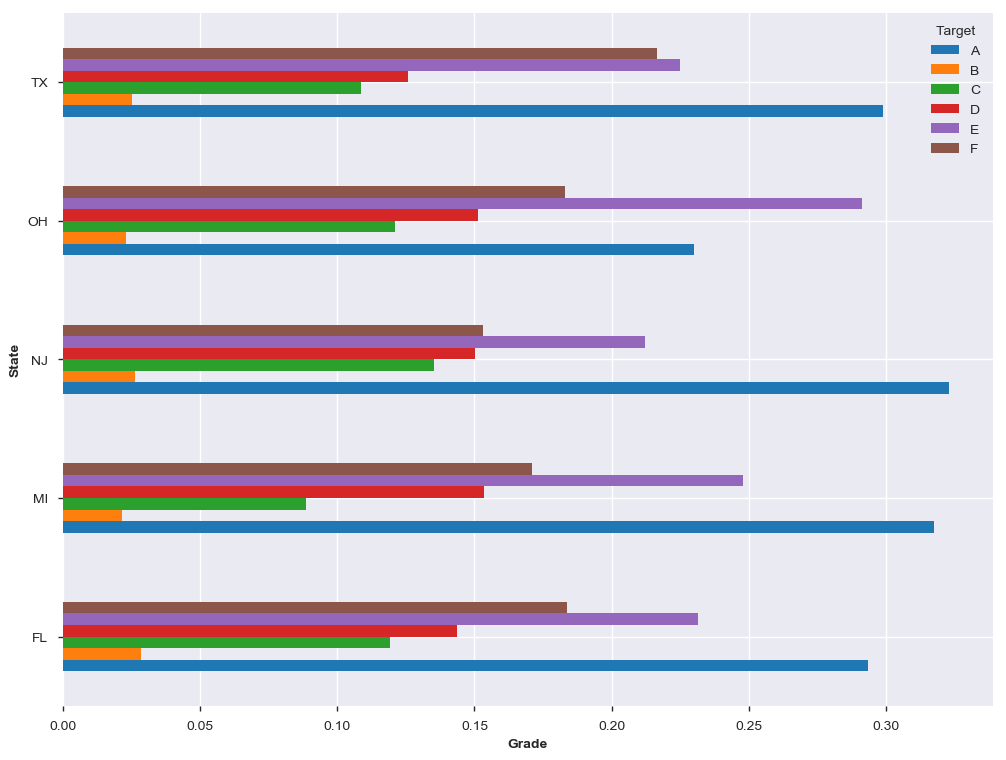

In [37]:
top5 = top_5.groupby('Entity_State')['Target'].value_counts(normalize=True).unstack()
top5.plot(kind='barh')
plt.xlabel('Grade',rotation=0, fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('State',fontsize=10, fontweight='bold')
plt.title('',fontsize=14, fontweight='bold')
plt.show();

In [38]:
#converting target and income level column back to categories in order to one-hot encode
data['Target'] = data.Target.astype('category')
data['Income_level'] = data.Income_level.astype('category')
data['Entity_State'] = data.Entity_State.astype('category')

## 3.1 - Creating subset of data 
We are creating a subset of data because our original dataset is too large, the computer we are using is not powerful enough to effeciently process this much data with the models used. 

In [39]:
#creating a subset of data using 3000 samples from 550000 
df_prep = data.sample(n=3000, random_state=10)
#reseting index 
df_prep.reset_index(inplace=True)

In [40]:
df_prep.head()

,index,Account_ID,Entity_ID,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Invoice_bal,Age,Target,Income_level,Age_MedIncome,PercentPaid_MedIncome,Numpymts_Prcntpaid,Invbal_Prcntpaid,Invbal_MedIncome,Invbal_Age
0,3941,18297916,18895997,DANIELSVILLE,GA,30633.0,61230.0,145.0,1.0,0.55,264.19,43.000000,E,50k_to_75k,2.632890e+06,33676.5,0.55,145.3045,161763.5370,11360.170000
1,12372,24121893,25299482,ORLANDO,FL,32812.0,47379.0,279.2,1.0,1.00,279.20,52.000000,A,35k_to_50k,2.463708e+06,47379.0,1.00,279.2000,132282.1680,14518.400000
2,1852,16226312,16823958,BRIERFIELD,AL,35035.0,76481.0,75.0,1.0,1.00,75.00,41.000000,A,75k_to_100k,3.135721e+06,76481.0,1.00,75.0000,57360.7500,3075.000000
3,12680,11443335,12093375,PARMA,OH,44134.0,41186.0,171.7,1.0,0.65,264.16,50.002115,D,35k_to_50k,2.059387e+06,26770.9,0.65,171.7040,108796.9376,13208.558734
4,12397,21841189,22439784,ORRVILLE,OH,44667.0,35993.0,27.3,1.0,0.30,91.00,34.000000,F,35k_to_50k,1.223762e+06,10797.9,0.30,27.3000,32753.6300,3094.000000


In [41]:
#creating variables for dropping columns 
drop_columns = ['index','Target', 'Account_ID', 'Entity_ID', 
                'Median_Household_Income', 'Total_Paid','Entity_City','Entity_State','Number_of_payments', 'Entity_Zip', 'Percent_Paid','Invbal_Prcntpaid']

Below we are spliting features and targets in preparation to normalizing our features. 

### 3.1.2 - Feature selection

In [42]:
#creating features to feed into predictors 
features = df_prep.drop(drop_columns, axis=1, inplace=False)

#creating target variable (y)
target = df_prep.Target 

In [43]:
#creating dummies, one-hot encode prior to standardizing 
import time
start_time = time.time()

predictors = pd.get_dummies(features)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.006693840026855469 seconds ---


### 3.1.3 - Normalizing our data

In [44]:
#scaling features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(predictors)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Machine Learning 

## 4.1 - Importing library for models

Below we are creating an ensemble method for classification to discover which algorithm provide the best result. We will use pipelines to stream line our process. 

In [45]:
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, auc, accuracy_score, classification_report, roc_curve, precision_score,recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn import svm 
import warnings
warnings.filterwarnings("ignore")

### 4.1.2 - Model_1 
**Specifications:**
- y variable: target
- X variable: scaled_features 
- sample size: n=3000, random_state=10
- dropped columns
- PCA = used, n_components=7, random_state=123

**Features Used:(8)** 
- Purchased_Balance
- Age
- Income_level
- Age_MedIncome 
- TotalPaid_MedIncome
- Numpymts_Prcntpaid

In [48]:
#spliting our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state=10, test_size=0.3)

In [82]:
import time 
start_time = time.time()


#Logistic Regression Lasso
pipe_logreg_lasso = Pipeline([('pca', PCA(random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l1', random_state=123))])

#Logistic Regression Ridge
pipe_logreg_ridge = Pipeline([('pca', PCA( random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l2', random_state=123))])
                    
#Support Vector Machine 
pipe_svm= Pipeline([('pca', PCA(random_state=123)), 
                   ('clf', svm.SVC(random_state=123))])          

#Random Forest
pipe_rf = Pipeline([('pca', PCA(random_state=123)), 
                   ('clf', RandomForestClassifier(random_state=123))])
                        
#GradientBoosting Classifier
pipe_gb = Pipeline([('pca', PCA(random_state=123)),
            ('clf', GradientBoostingClassifier(random_state = 123))])                        
                        
# list pipelines, list of pipeline names
pipelines =  [pipe_logreg_lasso, pipe_logreg_ridge, pipe_rf, pipe_svm, pipe_gb]
names = ['LogReg Lasso', 'LogReg Ridge', 'Random Forest', 'SVM', 'GradientBoosting Classifier']
pipe_1_Models = []

# loop to fit each of the three pipelines
for i in pipelines: 
    print(i)
    i.fit(X_train, y_train)
    
for index, val in enumerate(pipelines): 
    print('%s pipeline train accuracy: %.3f' % (names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (names[index], val.score(X_test, y_test)))
#     print('%s pipeline F1 Score: %.3f' % (names[index], val.f1_score(X_test, y_test)))
#     print('%s pipeline Precission Score: %.3f' % (names[index], val.precision_score(X_test, y_test)))
#     print('%s pipeline Recall Score: %.3f' % (names[index], val.recall_score(X_test, y_test)))
    
    
    score = names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    pipe_1_Models.append(score)
                        
print("--- %s seconds ---" % (time.time() - start_time))                        

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_sol

In [83]:
#storing results in dataframe
model_1 = pd.DataFrame.from_records(pipe_1_Models,  columns=['Model_1', 'Train', 'Test'])
model_1.mean()

Train    0.837524
Test     0.733333
dtype: float64

### 4.1.3 - Model_2
The same specifications and features from model 1 are used. The difference here, we've inserted the optimal hyperparameters by performing a gridsearch using cross-validation of 7. 

In [ ]:
l1 {'logisticregression__C': 444.445}
l2 {'logisticregression__C': 111.11200000000001}
rf {'randomforestclassifier__max_features': 0.33, 'randomforestclassifier__n_estimators': 100}
gb {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}

In [106]:
import time 
start_time = time.time()

#spliting our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target,random_state=10, test_size=0.3)


#Logistic Regression Lasso
pipe_logreg_lasso = Pipeline([('pca', PCA(n_components=14, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l1',C= 444.445, random_state=123))])

#Logistic Regression Ridge
pipe_logreg_ridge = Pipeline([('pca', PCA(n_components=14, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l2',C= 111.112, random_state=123))])
                              
#Random Forest
pipe_rf = Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features=0.33, n_estimators=100, random_state=123))])
                    
#Support Vector Machine 
pipe_svm= Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', svm.SVC(C=10, kernel='linear',random_state=123))])            
                        
#GradientBoosting Classifier
pipe_gb = Pipeline([('pca', PCA(n_components=14, random_state=123)),
            ('clf', GradientBoostingClassifier(learning_rate=.05, max_depth=3, n_estimators=200, random_state = 123))])                        
                                         
                        
# list pipelines, list of pipeline names
pipelines =  [pipe_logreg_lasso, pipe_logreg_ridge, pipe_rf, pipe_svm, pipe_gb]
names = ['LogReg Lasso', 'LogReg Ridge', 'Random Forest', 'SVM', 'GradientBoosting Classifier']
pipe_2_Models = []

# loop to fit each of the three pipelines
for i in pipelines: 
    print(i)
    i.fit(X_train, y_train)
    
for index, val in enumerate(pipelines): 
    print('%s pipeline train accuracy: %.3f' % (names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (names[index], val.score(X_test, y_test)))
    
    score = names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    pipe_2_Models.append(score)
                        
print("--- %s seconds ---" % (time.time() - start_time))                        

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=444.445, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=111.112, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_s

In [107]:
#storing results in dataframe
model_2 = pd.DataFrame.from_records(pipe_2_Models,  columns=['Model_2', 'Train', 'Test'])
model_2.mean()

Train    0.860286
Test     0.767333
dtype: float64

### Model_3

In [103]:
import time 
start_time = time.time()

#spliting our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target,random_state=10, test_size=0.3)


#Logistic Regression Lasso
pipe_logreg_lasso = Pipeline([('pca', PCA(n_components=15, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l1',C= 444.45, random_state=123))])

#Logistic Regression Ridge
pipe_logreg_ridge = Pipeline([('pca', PCA(n_components=15, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l2',C= 111.112, random_state=123))])
                              
#Random Forest
pipe_rf = Pipeline([('pca', PCA(n_components=15, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123))])
                    
#Support Vector Machine 
pipe_svm= Pipeline([('pca', PCA(n_components=15, random_state=123)), 
                   ('clf', svm.SVC(C=10, kernel='linear',random_state=123))])            
                        
#GradientBoosting Classifier
pipe_gb = Pipeline([('pca', PCA(n_components=15, random_state=123)),
            ('clf', GradientBoostingClassifier(learning_rate=.05, max_depth=3, n_estimators=100, random_state = 123))])                        
                                         
                        
# list pipelines, list of pipeline names
pipelines =  [pipe_logreg_lasso, pipe_logreg_ridge, pipe_rf, pipe_svm, pipe_gb]
names = ['LogReg Lasso', 'LogReg Ridge', 'Random Forest', 'SVM', 'GradientBoosting Classifier']
pipe_3_Models = []

# loop to fit each of the three pipelines
for i in pipelines: 
    print(i)
    i.fit(X_train, y_train)
    
for index, val in enumerate(pipelines): 
    print('%s pipeline train accuracy: %.3f' % (names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (names[index], val.score(X_test, y_test)))
    
    score = names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    pipe_3_Models.append(score)
                        
print("--- %s seconds ---" % (time.time() - start_time))     

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=15, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=444.45, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=15, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=111.112, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=15, random_state=123,
  svd_so

In [108]:
model_3 = pd.DataFrame.from_records(pipe_3_Models,  columns=['Model_3', 'Train', 'Test'])
model_3.mean()

Train    0.846000
Test     0.761778
dtype: float64

# 4.2 - Model comparison  

In [109]:
#creating function to convert list to tuple
def convert(list): 
    return tuple(list) 

Models_mean = [model_1.mean(), model_2.mean(), model_3.mean()]
Models_specs = []

for i in Models_mean:
    Models_specs.append(convert(i))
    
Models_data_mean = pd.DataFrame.from_records(Models_specs,  columns=['Train', 'Test'])

In [110]:
#appending a Residual column 
Models_data_mean.index = np.arange(1, len(Models_data_mean) + 1)
Models_data_mean['Residual'] = Models_data_mean.Test - Models_data_mean.Train
Models_data_mean

#setting index to model names
Models_data_mean = Models_data_mean.set_index([pd.Index(['Model_1', 'Model_2', 'Model_3'])])

### 4.2.1 - Classification report for our models

In [111]:
#printing our classification report for all models
for index, val in enumerate(pipelines):
    print(f'{names[index]}:')
    print(classification_report(y_test, val.predict(X_test)))
    print('--------------------------------------------------------')

LogReg Lasso:
              precision    recall  f1-score   support

           A       0.96      0.99      0.97       249
           B       1.00      0.04      0.08        25
           C       0.69      0.08      0.14       115
           D       0.27      0.08      0.13       143
           E       0.46      0.92      0.62       224
           F       0.91      0.88      0.89       144

   micro avg       0.67      0.67      0.67       900
   macro avg       0.72      0.50      0.47       900
weighted avg       0.68      0.67      0.61       900

--------------------------------------------------------
LogReg Ridge:
              precision    recall  f1-score   support

           A       0.95      1.00      0.97       249
           B       1.00      0.04      0.08        25
           C       0.73      0.07      0.13       115
           D       0.27      0.08      0.13       143
           E       0.46      0.92      0.62       224
           F       0.91      0.88      0.89    

In [112]:
Models_data_mean

,Train,Test,Residual
Model_1,0.837524,0.733333,-0.104190
Model_2,0.860286,0.767333,-0.092952
Model_3,0.846000,0.761778,-0.084222


#### Observations:
The first thing that stands out, our models before parameter tuning, is more accurate with its training data but has a large residual between its test results. Therefore more overfit vs. after inserting our best parameters. 

Our models showed pretty similar accuracy results, with Model_2_H being the winner with the least residual. Our weighted average F-1 score is roughly 60%, not too exciting. Our classification report shows a disproportional F-1 score between our classified groups. Groups A and E fairly well classified, and the rest are misclassified. 

The dispropotionality is caused by our imbalanced data. During our EDA, we noticed significant gaps between our Groups, with A and E consiting of 67% of our data. This may, cause skewness in our model's ability to distinguish between classes. Also, this tells us that our model's accuracy is primarily driven by its ability to classify group A and D.  

**Note:** Accuracy is not neccessarly the be-all and end-all model metric. It often depends on the "business challenge" we are trying to solve. Accuracy is defined as (True positive + True negative) / Total observations. And depending on the business challenge, other metrics with accounts for accuracy may be used to achieve the goal (precision, recall, F-1 score). 

In section 4.4, we'll dive into Precision, Recall, and F-1 score to further explain our models and how to balance our data using Synthetic Minority Over-sampling Technique, known as SMOTE.

## 4.3 - Parameter tuning 
Note: this step is completed prior to setting hyperparameters in algorithms. During this step, we will discover the best parameters and use it in models 1_H and 2_H. 

### 4.3.1 - Building pipeline for SVM to find optimum hyperparameters

In [92]:
#finding best parameter for svm 
from sklearn.model_selection import GridSearchCV

start_time = time.time()

pipe_svm = Pipeline([('pca', PCA(n_components=10)),
            ('clf', svm.SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=10, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

print("--- %s seconds ---" % (time.time() - start_time))  

time.time() - start_time

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   13.8s finished


Best accuracy: 0.713

Best params:
 {'clf__C': 10, 'clf__kernel': 'linear'}
--- 14.137940168380737 seconds ---


14.138005018234253

**SVM hyperparameter Best params:**
- clf__C: 10
- clf__kernel: linear


### 4.3.2 - Building pipeline to find optimal hyperparameters:
- Lasso (logreg)
- Ridge (logreg)
- Random Forest Classifier 
- Gradient Boosting Classifier

In [93]:
start_time = time.time()
#spliting our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)

from sklearn.pipeline import make_pipeline

#build pipelines

#model pipelines 
pipelines = {'l1': make_pipeline(StandardScaler(),
                                LogisticRegression(penalty='l1', random_state=123)),
             'l2': make_pipeline(StandardScaler(),
                                LogisticRegression(penalty='l2', random_state=123)),
             'rf': make_pipeline(StandardScaler(),
                                RandomForestClassifier(random_state=123)),
             'gb': make_pipeline(StandardScaler(),
                                GradientBoostingClassifier(random_state=123))
            }
print("--- %s seconds ---" % (time.time() - start_time))  

pipelines

--- 0.002719879150390625 seconds ---


{'l1': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'l2': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(boot

### 4.3.3 - Declaring hyperparameters 

In [94]:
#declare hyperparameters
#research proper range for each hyperparameter to allow for best performance in GridSearchCV
l1_hp = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
l2_hp = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
rf_hp = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
    }
gb_hp = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
    }

hyperparameters = {'l1': l1_hp,
                   'l2': l2_hp,
                   'rf': rf_hp,
                   'gb': gb_hp
                  }

### 4.3.4 - Fit and tune with cross-validation (cv=7)

In [95]:
start_time = time.time()

#fit and tune with cross-validation
fitted_models = {}

for name, pipeline in pipelines.items():
    #Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=7, n_jobs=-1)
    
    #Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
    
print("--- %s seconds ---" % (time.time() - start_time))  

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
--- 104.48886299133301 seconds ---


In [96]:

# evaluation metrics, printing best cross-validated score
#represents different metrics depending on your machine learning task. 

for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.6942857142857143
l2 0.6947619047619048
rf 0.9228571428571428
gb 0.9642857142857143


In [97]:
#finding best parameters
for name, model in fitted_models.items():
    print(name, model.best_params_)

l1 {'logisticregression__C': 444.445}
l2 {'logisticregression__C': 111.11200000000001}
rf {'randomforestclassifier__max_features': 0.33, 'randomforestclassifier__n_estimators': 100}
gb {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}


**Best Parameters for models:**
- l1 {'logisticregression__C': 111.112}
- l2 {'logisticregression__C': 1000.0}
- rf {'randomforestclassifier__max_features': 0.33, 'randomforestclassifier__n_estimators': 200}
- gb {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 100}x_depth': 1, 'gradientboostingclassifier__n_estimators': 100}

The best parameters were used in model_1_H and model_2_H in order to optimize models. 

## 4.4 - Balancing data (SMOTE)

To compensate for our imbalanced dataset, we can use a Synthetic Minority Over-sampling Technique, known as SMOTE. SMOTE uses the nearest neigbors observations to create synthetic data. Its important to note that SMOTE is used **only on training data**, in order to not generate synthetic observations. 

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target,random_state=10, test_size=0.3)

In [113]:
#resample data using ONLY training data
X_smote, y_smote = SMOTE().fit_sample(X_train, y_train)

### 4.4.1 - Generating model using SMOTE

In [114]:
start_time = time.time()

#perform normal train-test-split using our SMOTE data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state= 10, test_size=0.3)

#Logistic Regression Lasso
pipe_logreg_lasso = Pipeline([('pca', PCA(n_components=7, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l1',C= 444.45, random_state=123))])

#Logistic Regression Ridge
pipe_logreg_ridge = Pipeline([('pca', PCA(n_components=7, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l2',C= 111.112, random_state=123))])
                              
#Random Forest
pipe_rf = Pipeline([('pca', PCA(n_components=7, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features=0.33, n_estimators=100, random_state=123))])
                    
#Support Vector Machine 
pipe_svm= Pipeline([('pca', PCA(n_components=7, random_state=123)), 
                   ('clf', svm.SVC(C=10, kernel='linear',random_state=123))])            
                        
#GradientBoosting Classifier
pipe_gb = Pipeline([('pca', PCA(n_components=7, random_state=123)),
            ('clf', GradientBoostingClassifier(learning_rate=.05, max_depth=3, n_estimators=200, random_state = 123))])                        
                                         
# list pipelines, list of pipeline names
s_pipelines =  [pipe_logreg_lasso, pipe_logreg_ridge, pipe_rf, pipe_svm, pipe_gb]
s_names = ['LogReg Lasso', 'LogReg Ridge', 'Random Forest', 'SVM', 'GradientBoosting Classifier']
s_pipe_Model = []

# loop to fit each of the three pipelines
for i in s_pipelines: 
    print(i)
    i.fit(X_train, y_train)
    
for index, val in enumerate(s_pipelines): 
    print('%s pipeline train accuracy: %.3f' % (s_names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (s_names[index], val.score(X_test, y_test)))
    
    score = s_names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    s_pipe_Model.append(score)
                        
print("--- %s seconds ---" % (time.time() - start_time))                        


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=444.45, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=111.112, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=123,
  svd_solve

### 4.4.2 - Results 

In [115]:
s_model = pd.DataFrame.from_records(s_pipe_Model,  columns=['SMOTE_Model', 'Train', 'Test'])
print(s_model.mean())
s_model

Train    0.681469
Test     0.609625
dtype: float64


,SMOTE_Model,Train,Test
0,LogReg Lasso,0.485349,0.481232
1,LogReg Ridge,0.485761,0.488932
2,Random Forest,1.000000,0.801732
3,SVM,0.555097,0.549567
4,GradientBoosting Classifier,0.881139,0.726660


In [116]:
smote_model_mean = pd.DataFrame.from_records([convert(s_model.mean())], columns=['Train', 'Test'])
smote_model_mean['Residual'] = smote_model_mean.Test - smote_model_mean.Train
smote_model_mean = smote_model_mean.set_index([pd.Index(['SMOTE_Model'])])
smote_model_mean

,Train,Test,Residual
SMOTE_Model,0.681469,0.609625,-0.071845


In [117]:
#printing our classification report for all models
for index, val in enumerate(s_pipelines):
    print(f'{s_names[index]}:')
    print(classification_report(y_test, val.predict(X_test)))
    print('--------------------------------------------------------')

LogReg Lasso:
              precision    recall  f1-score   support

           A       0.55      0.81      0.66       177
           B       0.53      0.55      0.54       157
           C       0.62      0.18      0.28       184
           D       0.40      0.27      0.32       180
           E       0.24      0.18      0.21       168
           F       0.51      0.91      0.65       173

   micro avg       0.48      0.48      0.48      1039
   macro avg       0.47      0.48      0.44      1039
weighted avg       0.48      0.48      0.44      1039

--------------------------------------------------------
LogReg Ridge:
              precision    recall  f1-score   support

           A       0.56      0.81      0.66       177
           B       0.54      0.56      0.55       157
           C       0.62      0.19      0.29       184
           D       0.43      0.29      0.35       180
           E       0.23      0.18      0.21       168
           F       0.51      0.91      0.65    

#### Observations: 
By balancing our data, we were able to increase our F-1 average score but decreased our test accuracy. We were able to remove bias, and created a more even distribution among the classes but our accuracy score suffered because of it. 

# Conclusions

In [46]:
features.head()

,Invoice_bal,Age,Income_level,Age_MedIncome,PercentPaid_MedIncome,Numpymts_Prcntpaid,Invbal_MedIncome,Invbal_Age
0,264.19,43.000000,50k_to_75k,2.632890e+06,33676.5,0.55,161763.5370,11360.170000
1,279.20,52.000000,35k_to_50k,2.463708e+06,47379.0,1.00,132282.1680,14518.400000
2,75.00,41.000000,75k_to_100k,3.135721e+06,76481.0,1.00,57360.7500,3075.000000
3,264.16,50.002115,35k_to_50k,2.059387e+06,26770.9,0.65,108796.9376,13208.558734
4,91.00,34.000000,35k_to_50k,1.223762e+06,10797.9,0.30,32753.6300,3094.000000


In [66]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target,random_state=10, test_size=0.3)

In [67]:
forest = RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [68]:
gb = GradientBoostingClassifier(learning_rate=.05, max_depth=1, n_estimators=100, random_state = 123)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=123,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [69]:
rf_imp = forest.feature_importances_
gb_imp = gb.feature_importances_

In [70]:
gb_list = []
rf_list = []

for name, importance in zip(features, 100*(rf_imp/ rf_imp.max())):
    print(name, '=', importance)
    rf_list.append(importance)
    
print('\n')    

for name, importance in zip(features, 100*(gb_imp/ gb_imp.max())):
    print(name, '=', importance)
    gb_list.append(importance)    

Invoice_bal = 8.285127823945585
Age = 6.813118378635835
Income_level = 9.394135963604775
Age_MedIncome = 55.29548972531602
PercentPaid_MedIncome = 100.0
Numpymts_Prcntpaid = 9.322824540558207
Invbal_MedIncome = 8.38980314162643
Invbal_Age = 0.023001026112644582


Invoice_bal = 0.0
Age = 0.0
Income_level = 0.0
Age_MedIncome = 29.387706428060778
PercentPaid_MedIncome = 100.0
Numpymts_Prcntpaid = 0.47194491480702633
Invbal_MedIncome = 0.0
Invbal_Age = 0.0


In [54]:
gd_col = pd.DataFrame(features.columns)
boost = pd.DataFrame(gb_list)
boost = pd.concat([gd_col, boost],axis=1)

boost.columns = ['features', 'coef']
boost.drop(boost.index[[4]], inplace = True)
boost

,features,coef
0,Invoice_bal,0.000000
1,Age,0.000000
2,Income_level,0.000000
3,Age_MedIncome,29.387706
5,Numpymts_Prcntpaid,0.471945
6,Invbal_MedIncome,0.000000
7,Invbal_Age,0.000000


In [55]:
ft = pd.DataFrame(features.columns)
rf = pd.DataFrame(rf_list)

random = pd.concat([ft, rf],axis=1)
random.columns = ['features', 'coef']
random.drop(random.index[[4]], inplace=True)
random

,features,coef
0,Invoice_bal,8.285128
1,Age,6.813118
2,Income_level,9.394136
3,Age_MedIncome,55.295490
5,Numpymts_Prcntpaid,9.322825
6,Invbal_MedIncome,8.389803
7,Invbal_Age,0.023001


### 5.1 - Feature importance 

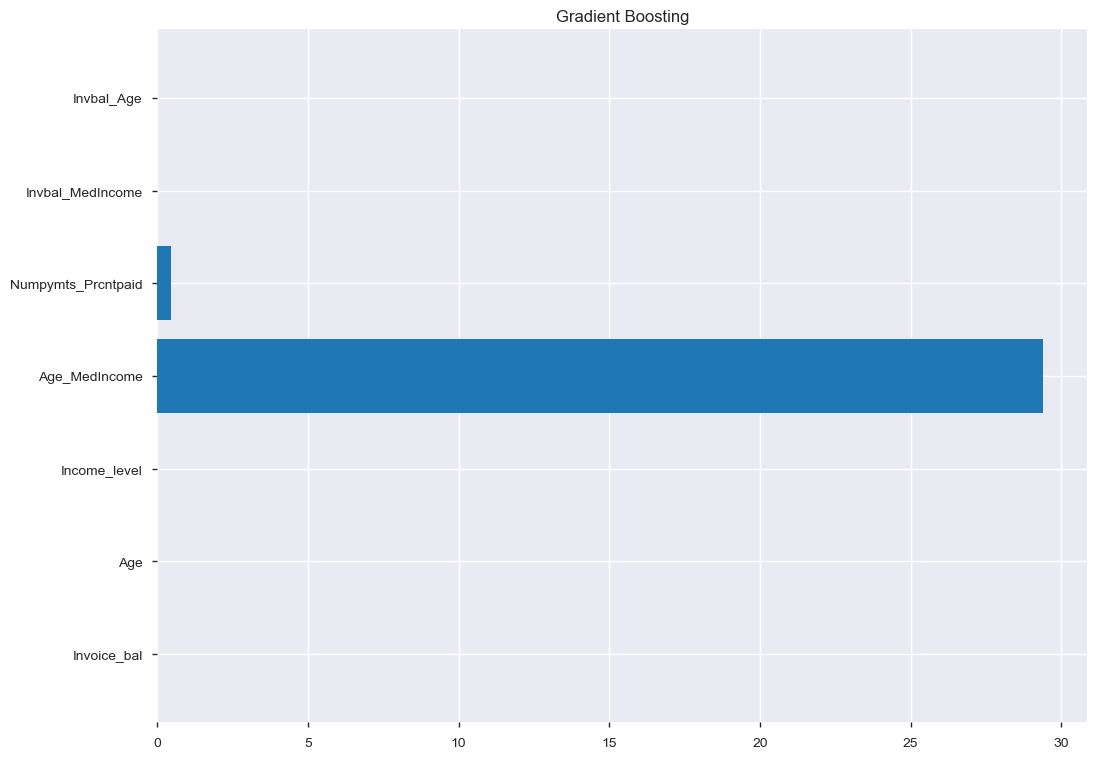

In [57]:
plt.barh(boost.features, boost.coef)
plt.title('Gradient Boosting');

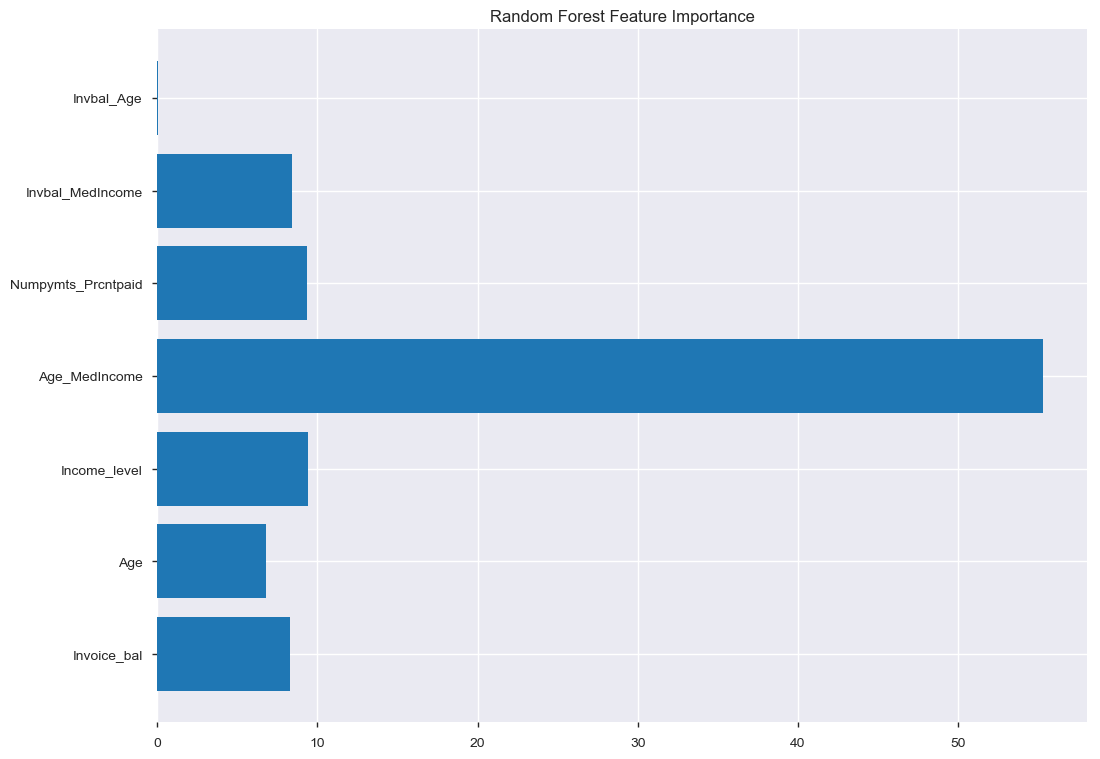

In [58]:
plt.barh(random.features, random.coef)
plt.title('Random Forest Feature Importance');

The graph above shows Age_MedIncome as the clear winner of feature importance. Our random forest and gradient boosting model sees Age_MedIncome as the most important feature to classify accounts into likely groups with a accuracy of roughly 77%.

In [132]:
Models_data_mean

,Train,Test,Residual
Model_1,0.837524,0.733333,-0.104190
Model_2,0.860286,0.767333,-0.092952
Model_3,0.846000,0.761778,-0.084222


### 5.2 - Conclusion

**Can we predict percentage of payment made by patients on overdue hospital bill, based on median household income by zip code?** We can conclude that the answer is **YES**. 

Based on dataset, we concluded that our model can predict with 77% accuracy, the percentage of payment made by patients on their overdue hospital bill based on features used. 

Using our all of our models, we received an avarage accuracy score of 77%. This score is good but not great. Going forward, we would like to further explore classification algorithms. 

**Findings**:
- Patients with Income level between 50k to 75k are more likely to make payments on their overdue hospital bill.
- 56% of patients that have made payments, fall under income level 50k to 75k. 
- Within that income level, 29% of patients pay between 90-100% of their hospital bill, and 26% of patients pay between 50-60% of their hospital bill.

Note: Our intial run through with SMOTE resulted in much increased accuracy score (using cv=3, default parameters in models, and using only 500 records), 60% and 85% before and after SMOTE. By increasing our cross-validation to 10 and increasing our records to 3k, we received a lesser accuracy when using SMOTE. We also couldln't get XGBoost to run properly nor, can we print the feature importance for svm.SVC. 

## 5.3 - Further Work

- Get XGBoost to work 
- Increase scores by feature selection, feature engineering, using larger sample size. 
- Would like to run the model using all of the data, 530K + records
- Further EDA and modeling (section 2.5) into each features e.g. zip code breakdown on income level and grades. 
- Try using liner regression models to see if we can achieve better results.